#**ELIMINAÇÃO DE GAUSS**

O método da **Eliminação de Gauss** consiste em transformar um sistema linear em um sistema linear triangular superior equivalente, pois um sistema dessa forma pode ser resolvido diretamente com a resolução retroativa. 


Assim, o método resume-se em aplicar sucessivas operações elementares em um sistema linear para o transformar num sistema de mais fácil resolução, tendo este as mesmas soluções que o original. 

Dado um sistema

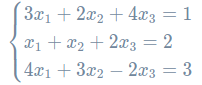

Podemos Representa-lo de forma de uma matriz como: 

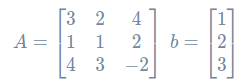

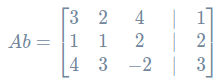

In [33]:
import matplotlib.pyplot as plt
import numpy as np


A = np.array([[3., 2., 4.],
              [1., 1., 2.],
              [4., 3., -2.]])

b = np.array([
  [1.],
  [2.],
  [3.],   
])

A = np.concatenate((A,b), axis=1)

print(A)

[[ 3.  2.  4.  1.]
 [ 1.  1.  2.  2.]
 [ 4.  3. -2.  3.]]


Para que a matriz $Ab$ se torna uma matriz diagonal superior, devemos utilizar um método de escalonamento utilizando fatores.

Escolhemos um pivô que vai ser o elemento da diagonal principal, no caso o 3, pois precisamos zerar todos os elementos abaixo dele.

$f_{21} = \frac{A_{21}}{A_{11}} = \frac{1}{3}$

Depois pegamos a segunda Linha menos o fator multiplicado com a primeira linha.

$L_2 = L_2 - f_{21}L_1$

Iremos fazer isso na terceira linha também.

$f_{31} = \frac{A_{31}}{A_{11}} = \frac{4}{3}$

$L_3 = L_3 - f_{31}L_1$

Zerando os números da coluna abaixo do pivô, o novo pivô será o segundo elemento da diagonal principal (que no caso é o $\frac{1}{3}$) e repetimos o mesmo processo anteriormente. Calculamos o fator da linha.

$f_{32} = \frac{A_{32}}{A_{22}} = 1$

$L_3 = L_3 - f_{32}L_2$

In [34]:
lista_fatores = []


print(f'\n0:\n {A}')

pivo = A[0][0]
for i in range(1, 3):
  fator = A[i][0]/pivo
  lista_fatores.append(fator)
  A[i][:] = A[i][:] - fator*A[0][:]

A = A.astype(np.float16)

print(f'\n1:\n {A}')

pivo = A[1][1]
for i in range(2,3):
  fator = A[i][1]/pivo
  lista_fatores.append(fator)
  A[i][:] = A[i][:] - fator*A[1][:]

A = A.astype(np.float16)
print(f'\n2:\n {A}')

pivo = A[2][2]
for i in range(3,3):
  fator = A[i][2]/pivo
  lista_fatores.append(fator)
  A[i][:] = A[i][:] - fator*A[2][:]

A = A.astype(np.float16)
print(f'\n3:\n {A}')

print(f'\n\nFatores: {lista_fatores}')
print(f'Soma dos fatores: {sum(lista_fatores)}')


0:
 [[ 3.  2.  4.  1.]
 [ 1.  1.  2.  2.]
 [ 4.  3. -2.  3.]]

1:
 [[ 3.      2.      4.      1.    ]
 [ 0.      0.3333  0.6665  1.667 ]
 [ 0.      0.3333 -7.332   1.667 ]]

2:
 [[ 3.      2.      4.      1.    ]
 [ 0.      0.3333  0.6665  1.667 ]
 [ 0.      0.     -8.      0.    ]]

3:
 [[ 3.      2.      4.      1.    ]
 [ 0.      0.3333  0.6665  1.667 ]
 [ 0.      0.     -8.      0.    ]]


Fatores: [0.3333333333333333, 1.3333333333333333, 1.0]
Soma dos fatores: 2.6666666666666665


Após deixar a matriz $Ab$ como uma matriz diagonal superior, basta resolver o sistema. Como pode ver o termo $x_3$ já pode ser resolvido.

**Sistema**

$3x_1 + 2x_2 + 4x_3 = 1$

$0x_1 + \frac{1}{3}x_2+\frac{2}{3}x_3 = \frac{5}{3}$

$0x_1 + 0x_2 -8x_3 = 0$


**Soluções**

$x_3 = 0$

$x_2 = \frac{\frac{5}{3}-\frac{2}{3}*0}{\frac{1}{3}} = 5$

$x_1 = \frac{1-2*5-4*0}{3} = -3$

**Esse Trecho do código serve para realizar o escalonamento de matrizes
de tamanhos variados de forma automática**

In [35]:
dim = list(np.shape(A))
print(dim)
print(f'\n0:\n {A}')

for c in range(0, dim[0]-1):

  for l in range(c+1, dim[0]):
    pivo = A[c][c]
    fator = A[l][c]/pivo
    A[l][:] = A[l][:] - fator*A[c][:]
    A = A.astype(np.float16)

  print(f'{c+1}:\n {A}')



[3, 4]

0:
 [[ 3.      2.      4.      1.    ]
 [ 0.      0.3333  0.6665  1.667 ]
 [ 0.      0.     -8.      0.    ]]
1:
 [[ 3.      2.      4.      1.    ]
 [ 0.      0.3333  0.6665  1.667 ]
 [ 0.      0.     -8.      0.    ]]
2:
 [[ 3.      2.      4.      1.    ]
 [ 0.      0.3333  0.6665  1.667 ]
 [ 0.      0.     -8.      0.    ]]


#**PIVOTAÇÃO**

Um sistema é dito mal condicionado quando uma pequena alteração no valor dos coeficientes causa uma grande alteração da solução exata. Esse mal condicionamento muitas vezes é causado pela presença de um pivô próximo de zero. Por exemplo, considere o sistema:

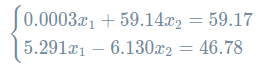

cuja solução exata é:

$x_1 = 10$

$x_2 = 1$



Vamos resolver esse sistema através da Eliminação de Gauss com 4 dígitos de precisão. Escrevendo a matriz aumentada do sistema:

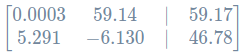

Calculando o fator temos:

$f_{}21 - \frac{A_{21}}{A_{11}} = \frac{5,291}{0,0003} \approx 1764$

$L_2 = L_2 - 1764L_1$

Obtemos: 

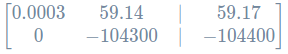

Agora podemos calcular os valores de $x_1$ e $x_2$ 

$x_2 = \frac{-104400}{-104300} = 1,001$

$x_1 = \frac{59,17-1.001*59,14}{0,0003} = -10 \not= 10$

O valor de $x_1$ não é condizente com a solução do sistema.



Para solucionar o problema utilizamos o método da pivotação.

Primeiro sempre procurar o maior valor **EM MÓÓDULO** para ser o pivô da diagonal principal.

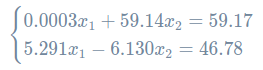

No caso anterior iremos trocar apenas as linhas:

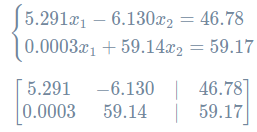


quando calculamos o fator, ficará:

$f_{21} = \frac{A_{21}}{A_{11}} = \frac{0,0003}{5,291} = 0,0000567$

$L_2​=L_2​−f_{21}​L_1​$ 

Obtemos: 

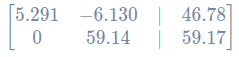

Resolvendo o sistema:

$x_2 = \frac{59.17}{59.14} = 1.001$

$x_1 = \frac{48.78+6.130*1.001}{5.291} = 10$

Obtendo um resultado condizente com a solução do sistema.